#FSI project:
## The Shopping Cart.

The goal of this project is to distinguish different items that can be bought in the supermarket. The dataset consists of 40 images of each class:

- Brick of gazpacho. 28
- Can of olives. 38
- Chocolate bar. 38
- Coke. 28
- Potato chips. 39
- Tuna. 40
- Yogurt. 35


First the available data will be loaded into drive and the GPU will be used for processing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
tf.test.gpu_device_name()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


''

In [ ]:
# Alba
!ls "/content/drive/My Drive/Proyecto - FSI/Dataset/"
path = "/content/drive/My Drive/Proyecto - FSI/Dataset/"

'Brick de gazpacho'  'Lata de aceitunas'  'Lata de refresco'   Yogur
 Chocolatina	     'Lata de atún'	  'Paquete de papas'


In [ ]:
# Ámbar
!ls "/content/drive/My Drive/Universidad/ULPGC/Ciencia de datos/FSI/Proyecto - FSI/Dataset/"
path = "/content/drive/My Drive/Universidad/ULPGC/Ciencia de datos/FSI/Proyecto - FSI/Dataset/"

Joined	model_87.h5  test  train


In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix


(-0.5, 3023.5, 3309.5, -0.5)

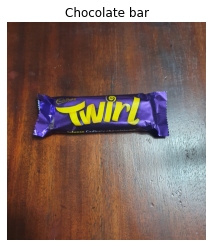

In [ ]:
# SHOW DATA
%matplotlib inline
pil_im = Image.open(path + 'Joined/Chocolate bar/20211125_163927.jpg', 'r')
plt.imshow(np.asarray(pil_im))
plt.title("Chocolate bar")
plt.axis('off')

In [ ]:
# DATA SOURCE --------------------------------------------------
image_size = (150, 150)
batch_size = 5

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path + "Joined",
    validation_split=0.2,
    labels='inferred',
    subset="training",
    seed=87,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path + "Joined",
    validation_split=0.2,
    labels='inferred',
    subset="validation",
    seed=87,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

Found 246 files belonging to 7 classes.
Using 197 files for training.
Found 246 files belonging to 7 classes.
Using 49 files for validation.


In [ ]:
# MODEL --------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential()
model.add(Rescaling(scale=(1./127.5), offset=-1, input_shape=(image_size[0], image_size[1], 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

#model.save(path + 'model_87.h5')

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

In [ ]:
# TRAINING --------------------------------------------------
epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=3, restore_best_weights=True)

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/200
40/40 [==============================] - 21s 459ms/step - loss: 2.6293 - accuracy: 0.2437 - val_loss: 1.8045 - val_accuracy: 0.2857
Epoch 2/200
40/40 [==============================] - 25s 570ms/step - loss: 1.4838 - accuracy: 0.4619 - val_loss: 1.3201 - val_accuracy: 0.5306
Epoch 3/200
40/40 [==============================] - 29s 639ms/step - loss: 1.0125 - accuracy: 0.6244 - val_loss: 1.1812 - val_accuracy: 0.5306
Epoch 4/200
40/40 [==============================] - 19s 416ms/step - loss: 0.7167 - accuracy: 0.7157 - val_loss: 0.9374 - val_accuracy: 0.6735
Epoch 5/200
40/40 [==============================] - 19s 419ms/step - loss: 0.6171 - accuracy: 0.7563 - val_loss: 0.8717 - val_accuracy: 0.7347
Epoch 6/200
40/40 [==============================] - 19s 430ms/step - loss: 0.4694 - accuracy: 0.8223 - val_loss: 0.8962 - val_accuracy: 0.6939
Epoch 7/200
40/40 [==============================] - 19s 433ms/step - loss: 0.4112 - accuracy: 0.8731 - val_loss: 0.7641 - val_accuracy:

### Evaluating results

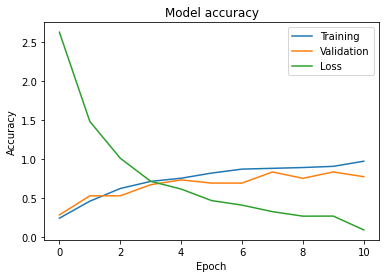

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation','Loss'], loc='upper right')
plt.show()

In [ ]:
# Classification report
results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

print(classification_report(labels, predictions, digits = 4))

              precision    recall  f1-score   support

           0     0.7500    0.6000    0.6667         5
           1     1.0000    0.8889    0.9412         9
           2     0.5556    1.0000    0.7143         5
           3     1.0000    0.7778    0.8750         9
           4     0.7500    0.8571    0.8000         7
           5     0.8000    0.6667    0.7273         6
           6     1.0000    1.0000    1.0000         8

    accuracy                         0.8367        49
   macro avg     0.8365    0.8272    0.8178        49
weighted avg     0.8689    0.8367    0.8411        49



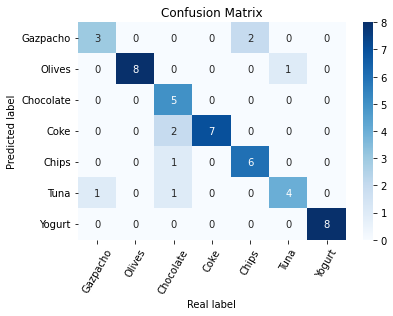

In [ ]:
# Confusion matrix
label_tag = ["Gazpacho", "Olives", "Chocolate", "Coke", "Chips", "Tuna", "Yogurt"]
cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
tick_marks = np.arange(len(label_tag))
plt.xticks(tick_marks+0.5, label_tag, rotation=60)
plt.yticks(tick_marks+0.5, label_tag, rotation='horizontal')
plt.title("Confusion Matrix")
plt.ylabel('Predicted label')
plt.xlabel('Real label')
plt.show()